<a href="https://colab.research.google.com/github/phmehta95/-skli-event-display/blob/main/Signal_analysis_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

If you haven't yet read the 'Signal analysis coursework brief' document on KEATS, look at that now. It includes important information about how and by when to submit.

Make your own copy of this notebook, then give answers to the questions below in the spaces provided. You can add more code and text boxes as needed. Word counts are suggested guidelines, not strict requirements.

If using Google Colab, you will need to download your notebook as an ipynb file for submission on KEATS once your coursework is complete.

# First steps

This section loads the data into two variables ecg1 and ecg2. You don't need to edit this.

In [2]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
uploaded = files.upload()


ecg1 = pd.read_csv('ECG_resting.csv', header = None)
ecg2 = pd.read_csv('ECG_exercising.csv', header = None)

Saving ECG_exercising.csv to ECG_exercising.csv
Saving ECG_resting.csv to ECG_resting.csv


# Task 1: Examine the data _[10 marks]_

Investigate the data provided and see what you have to work with. Determine:

- The length in second of each recording. Note that the first column of each CSV file contains time values in seconds.
- The sampling frequency in Hz.
- The resolution of the digitised data. The second column contains the ECG recording with values in mV.
- The maximum and minimum ECG value recorded in each dataset in mV.

Finally, plot a segment of each dataset showing a representative part of the data.

The length of ECG_resting is 45.945 seconds
The length of ECG_exercising is 67.945 seconds
The sampling frequency for ECG_resting is: 200 Hz
The sampling frequency for ECG_exercising is: 200 Hz
The resolution of the digitised data is 0.00016
Minimum ECG value for ECG_resting is: -0.219843745 mV
Maximum ECG value for ECG_resting is: 1.295624971 mV
Minimum ECG value for ECG_exercising is: -1.26453125476837 mV
Maximum ECG value for ECG_exercising is: 1.68171870708466 mV


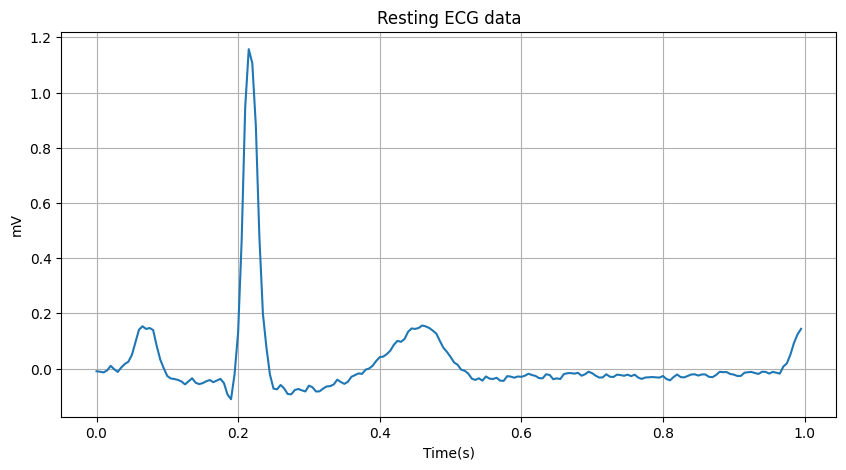

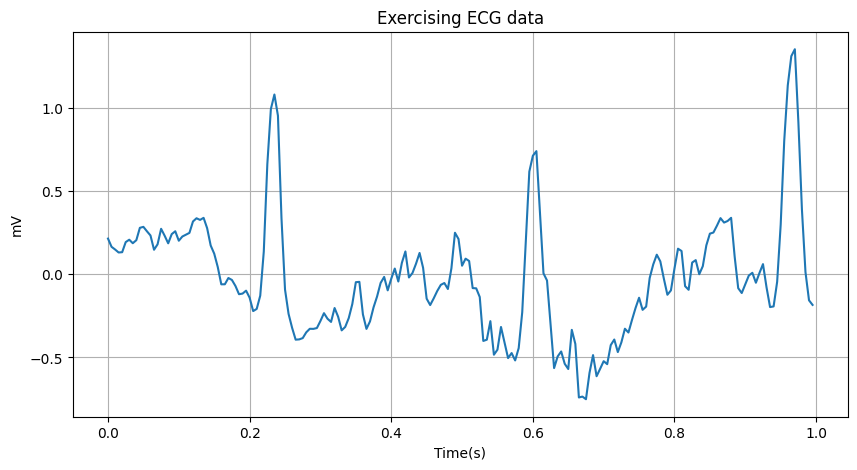

In [43]:
########Task 1###########

#####Part 1#########

ecg1_time = ecg1.iloc[-1, 0]#The length of each recording will be the final value of the first column
#print(ecg1_time)
ecg2_time = ecg2.iloc[-1, 0]
#print(ecg2_time)
print("The length of ECG_resting is", ecg1_time, "seconds")
print("The length of ECG_exercising is", ecg2_time, "seconds")

#####Part 2########
#The sampling frequency is the number of samples taken per second. Need to count the number of rows in 1 seconds worth of data
index1 = ecg1[ecg1[0] == 1].index[0]
index2 = ecg2[ecg2[0] == 1].index[0]
#print(index1)
#print(index2)
print("The sampling frequency for ECG_resting is:", index1, "Hz")
print("The sampling frequency for ECG_exercising is:", index2, "Hz")

#####Part 3#######
#For ECG_resting
#Want to find the smallest difference between unique ECG values
#First need to sort the mV data, and make sure we're only comparing unique values
ecg1_sorted = sorted(ecg1[1].unique())
#Removes any NaN values, finds the difference between elements and stores these differences in a 1D array
ecg1_difference = pd.Series(ecg1_sorted).dropna().diff()
#Finds the minimum value between these differences, prints this to 5 sig figs
min_difference1 = ecg1_difference.min()
#print( f"{min_difference1:.5f}")

#For ECG_exercising
ecg2_sorted = sorted(ecg2[1].unique())
ecg2_difference = pd.Series(ecg2_sorted).dropna().diff()
min_difference2 = ecg2_difference.min()
#print(f"{min_difference2:.5f}")
print("The resolution of the digitised data is " f"{min_difference1:.5f}")
#This gives a value of 0.00016mV



#####Part 4#######
print("Minimum ECG value for ECG_resting is:", ecg1[1].min(), "mV")
print("Maximum ECG value for ECG_resting is:", ecg1[1].max(), "mV")
print("Minimum ECG value for ECG_exercising is:", ecg2[1].min(), "mV")
print("Maximum ECG value for ECG_exercising is:", ecg2[1].max(), "mV" )


#####Part 5#######
#Plotting ECG_resting data
plt.figure(figsize=(10,5))
plt.plot(ecg1[0][:200],ecg1[1][:200]) #Plotting the first second of data
plt.xlabel('Time(s)')
plt.ylabel('mV')
plt.title('Resting ECG data')
plt.grid()


#Plotting ECG_exercising data
plt.figure(figsize=(10,5))
plt.plot(ecg2[0][:200],ecg2[1][:200])#Plotting the first second of data
plt.xlabel('Time(s)')
plt.ylabel('mV')
plt.title('Exercising ECG data')
plt.grid()
plt.show()









# Task 2: Investigate ECG analysis in practice _[20 marks]_

Explore the literature on ECG interpretation. What might be useful to measure from each ECG trace? The aim is to identify differences between the resting and exercising data.

Hints:
- Consider what might differ between a resting and an exercising state.
- Consider the consistency from one heartbeat to the next.
- Within each heartbeat, there are several stages that are indicated by different features of the ECG. What might be useful or interesting to measure here?

Recommended 250 words plus references.

## Task 2 answer:

The most intuitive difference between a resting and exercising ECG is heart rate – in order to sustain exercise for more than a few seconds, and to meet the increased oxygen and nutrient demand of active muscles, local blood flow must increase (1). This increase in blood flow corresponds to an increase in heart rate, which can be measured on an ECG waveform by calculating “R-R intervals”, defined as the time difference between successive R peaks (2), with exercise leading to a significant reduction of the R-R interval. Other changes in ECG patterns due to the stress of exercise includes a significant reduction in the Q-T interval (3), the total time for ventricular depolarisation and repolarisation.

Regarding the consistency of the ECG waveform from one heartbeat to the next, an important measurement is heart rate variability (HRV) – the changes in the time intervals between consecutive heartbeats (4). Due to exercise causing a shift from parasympathetic to sympathetic activity (from “rest and digest” to “fight or flight”), this results in a decrease in HRV (5). By measuring the variation in time between consecutive R-R intervals, HRV can be measured. Additionally, autocorrelation can be used to measure how the R-R intervals compare with ones at different times (6) along the ECG signal.

Finally, concerning the different features of the ECG pulse, exercise can affect the form of the PQRST wave. During exercise, the amplitude of the P-wave increases, in part due to the synchronous excitation of the atrial chambers (7), while there is a reduction in the magnitude of the T-wave (8). Therefore, the amplitude of the P and T-waves should be measured. In healthy individuals, there will also be a reduction in the amplitude of the R-wave during exercise, however, in patients with coronary artery disease, this amplitude increases (9). Additionally, a downward shift of the ST segment during exercise could indicate myocardial ischemia (10), showing the importance of stress-ECGs in detecting cardiac abnormalities.

**References:**


1. Simoons ML, Hugenholtz PG. Gradual changes of ECG waveform during and after exercise in normal subjects. Circulation. 1975 Oct;52(4):570–7.

2. Massaroni C, Silvestri S, Schena E. Comparison between heart rate estimated by single-lead ECG and optical-based wearable systems during outdoor running. In: 2024 IEEE International Workshop on Metrology for Industry 40 & IoT (MetroInd40 & IoT) [Internet]. 2024 [cited 2025 Oct 10]. p. 407–11. Available from: https://ieeexplore.ieee.org/document/10584238

3. FANANAPAZIR L, BENNETT DH, FARAGHER EB. Contribution of heart rate to QT interval shortening during exercise. Eur Heart J. 1983 Apr 1;4(4):265–71.

4. Shaffer F, Ginsberg JP. An Overview of Heart Rate Variability Metrics and Norms. Front Public Health. 2017 Sept 28;5:258.

5. Mongin D, Chabert C, Extremera MG, Hue O, Courvoisier DS, Carpena P, et al. Decrease of heart rate variability during exercise: An index of cardiorespiratory fitness. PLoS One. 2022 Sept 2;17(9):e0273981.

6. Hwang JS, Hu TH, Chen LC. An index related to the autocorrelation function of RR intervals for the analysis of heart rate variability. Physiol Meas. 2006 Apr;27(4):339–52.

7. Irisawa H, Seyama I. The configuration of the P wave during mild exercise. American Heart Journal. 1966 Apr 1;71(4):467–72.

8. Kitchin AH, Neilson JM. The T wave of the electrocardiogram during and after exercise in normal subjects. Cardiovascular Research. 1972 Mar 1;6(2):143–9.

9. Frass M, Glogar D, Probst P, Schuster J, Kaindl F. R-wave amplitude changes during exercise stress testing: patients with dilative cardiomyopathy compared to patients with coronary artery disease. J Electrocardiol. 1987 July;20(3):260–71.

10. Baer FM. [Stress-ECG is adequate to detect myocardial ischemia: when are additional diagnostic tests needed?]. Dtsch Med Wochenschr. 2007 Sept;132(39):2026–30.




# Task 3: Analyse and compare the data _[50 marks]_

Based on your brief literature review, write working code to make appropriate measurements from the data and present your measurements. 'Appropriate' means measuring something clinically meaningful that will highlight the differences between the resting and exercising ECG. The details of exactly what to measure are left to you to investigate. However, you should definitely be using both time domain and frequency domain methods in your analysis.

Of the 50 marks, 40 are for producing working code and 10 are for the code being well-written and commented.

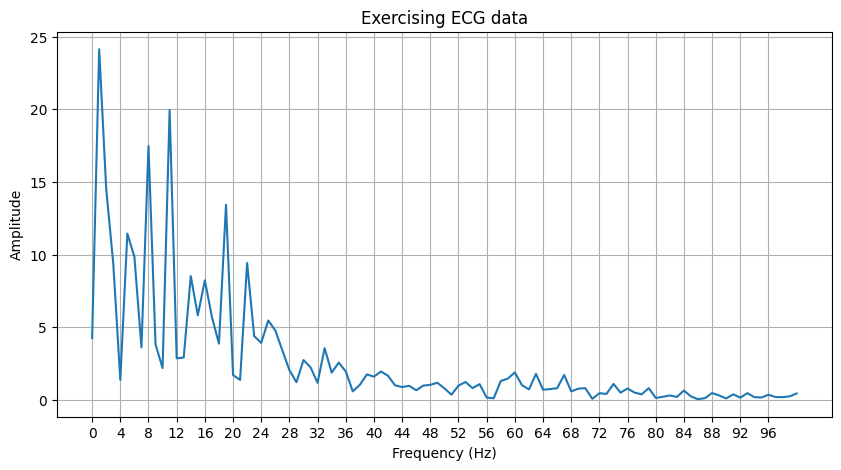

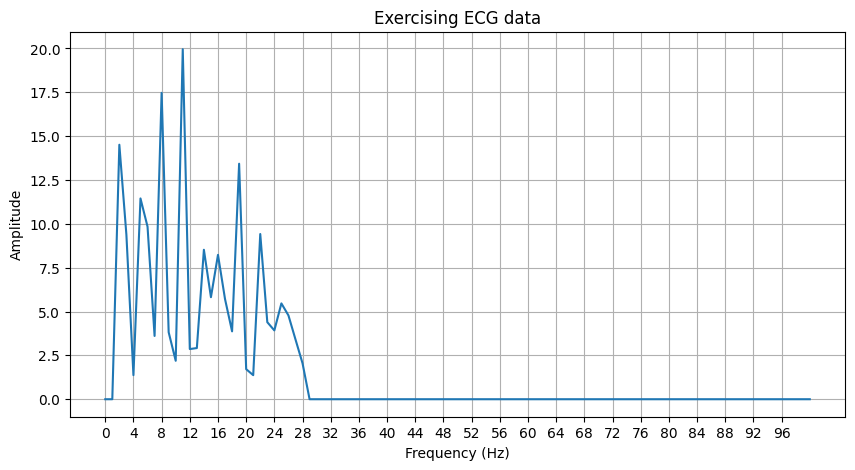

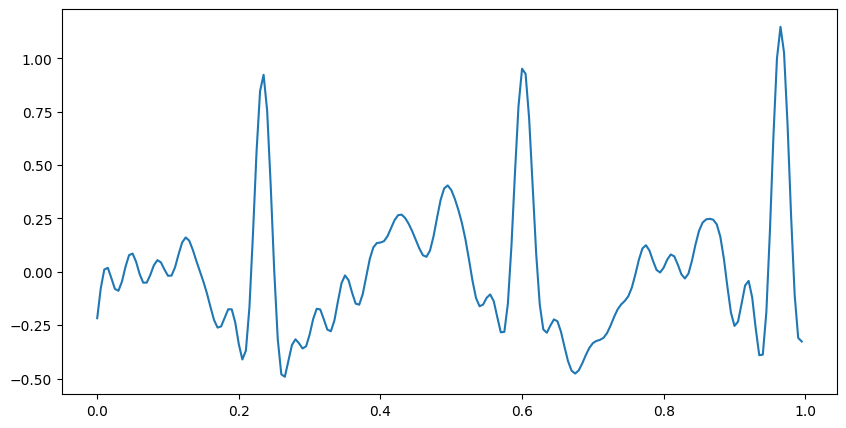

In [47]:

#Doing a Fourier Transform of the exercising signal - there is a fair amount of noise in the exercising signal in the PQ and ST segements of the multiple sinus rhythms present
from scipy.fft import rfft, rfftfreq, irfft
time_values_exercising = ecg2[0][:200]
ecg_values_exercising = ecg2[1][:200]

FFT_exercising = rfft(ecg_values_exercising)
freq_values_exercising = rfftfreq(len(time_values_exercising), d=time_values_exercising[1] - time_values_exercising[0])

# plot the FFT:
plt.figure(figsize=[10,5])
plt.plot(freq_values_exercising, abs(FFT_exercising))
plt.xticks(np.arange(0, 100, step=4))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Exercising ECG data')
plt.grid()
plt.show()

#Try and clean up the signal by removing all frequencies above 28 Hz - low pass filter to remove power line noise and muscle noise.
#High pass filter to remove electrode motion artifacts < 15 Hz.
#Calculate inverse Fourier transform and plot.
fft_exercising_filtered = FFT_exercising.copy()
fft_exercising_filtered[freq_values_exercising > 28] = 0
fft_exercising_filtered[freq_values_exercising < 2] = 0
plt.figure(figsize=[10,5])
plt.plot(freq_values_exercising, abs(fft_exercising_filtered))
plt.xticks(np.arange(0, 100, step=4))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Exercising ECG data')
plt.grid()
plt.show()

#Calculate inverse Fourier transform and plot
exercise_filtered = irfft(fft_exercising_filtered)
plt.figure(figsize=[10,5])
plt.plot(time_values_exercising, exercise_filtered)

#Checking for ST segment depression - overlaying






# Task 4: Discuss the results _[20 marks]_

Discuss the results you have found. In terms of what you have measured, what are the main differences between the two datasets? How do your measurements compare to clinical expectations?

Recommended 250 words.

## Task 4 answer: